In [110]:
# array and mathematical opperations
import numpy as np

# Scikit-Learn Preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.impute import SimpleImputer

# Scikit-Learn Metrics
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve, LearningCurveDisplay, ValidationCurveDisplay
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

# Scikit-Learn Models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.ensemble as sk

# Plotting
import matplotlib.pyplot as plt

# Writting and reading tools
import pandas as pd
import pickle

In [111]:
#import ast
#df = pd.read_csv("IAB330_Group13.movement_data2.csv")
df = pd.read_csv("IAB330_Group13_all_Data.csv")
#df = pd.read_csv("IAB330_Group13_all_Data_remove_w.csv")
df.head()

,timestamp,x_values[0],x_values[1],x_values[2],x_values[3],x_values[4],x_values[5],x_values[6],x_values[7],x_values[8],...,z_values[52],z_values[53],z_values[54],z_values[55],z_values[56],z_values[57],z_values[58],z_values[59],Movement_label,Session_ID
0,2024-09-30T11:37:11.973Z,0.392266,0.117680,0.313813,0.039227,0.431493,1.569064,1.686744,3.098901,2.471276,...,-3.020448,-2.785089,-4.471832,-2.275143,-0.509946,-1.255251,-0.588399,-0.706079,situps,joshua_1
1,2024-09-30T11:37:15.155Z,-6.197803,-5.962443,-6.040896,-5.648630,-5.883990,-10.081236,-10.826542,-8.747532,-8.276813,...,11.611074,12.787872,9.179024,7.806093,1.451384,2.824315,6.746975,4.903325,situps,joshua_1
2,2024-09-30T11:37:18.295Z,-6.825428,-5.217138,-5.609404,-3.373488,-0.902212,0.235360,-0.039227,0.274586,-1.176798,...,1.294478,0.235360,-0.313813,-0.431493,-0.470719,0.156906,0.745305,0.235360,situps,joshua_1
3,2024-09-30T11:37:21.403Z,2.706635,6.315483,6.864655,7.217694,8.433719,9.532064,11.689527,13.768537,14.356936,...,-1.961330,-2.745862,-3.844207,-4.942552,-5.334818,-5.256364,-6.158576,-7.492281,situps,joshua_1
4,2024-09-30T11:37:24.556Z,6.080123,4.667965,4.707192,4.118793,3.412714,3.059675,2.275143,0.706079,0.941438,...,0.156906,-0.117680,-0.313813,-0.627626,-1.490611,-2.432049,-2.628182,-3.844207,situps,joshua_1


In [112]:
df['x_values'] = df.filter(like='x_values').apply(lambda row: row.tolist(), axis=1)
df['y_values'] = df.filter(like='y_values').apply(lambda row: row.tolist(), axis=1)
df['z_values'] = df.filter(like='z_values').apply(lambda row: row.tolist(), axis=1)

#df = df[['Movement_label', 'timestamp', 'x_values', 'y_values', 'z_values']]
df = df[['Movement_label', 'x_values', 'y_values', 'z_values']]
df.head()

,Movement_label,x_values,y_values,z_values
0,situps,"[0.392266, 0.1176798, 0.3138128, 0.0392266, 0....","[-1.6867438, -2.5105024, -1.6867438, -2.981221...","[8.7083052, 8.3944924, 8.9436648, 7.649187, 7...."
1,situps,"[-6.1978028, -5.9624432, -6.0408964, -5.648630...","[-9.4536106, -8.0806796, -5.8055368, -4.354152...","[-0.2745862, 0.0784532, 1.4513842, 3.5696206, ..."
2,situps,"[-6.8254284, -5.2171378, -5.6094038, -3.373487...","[-7.3353742, -7.256921, -7.84532, -7.1000146, ...","[5.0210048, 2.353596, 1.8828768, 1.765197, 0.1..."
3,situps,"[2.7066354, 6.3154826, 6.864655, 7.2176944, 8....","[-12.4740588, -11.0619012, -4.3541526, -5.7663...","[-5.1386846, -6.1193496, -7.1392412, -6.119349..."
4,situps,"[6.080123, 4.6679654, 4.707192, 4.118793, 3.41...","[-10.1204628, -8.9828914, -12.2779258, -11.297...","[-6.5508422, -5.099458, -4.0403398, -4.511059,..."


In [113]:
# Find outliers and replace with mean
def replace_with_mean(array):
    array = np.array(array)
    array = np.where((array < -200) | (array > 200) | (array == 0), np.nan, array)
    imputer = SimpleImputer(strategy='mean')
    array = imputer.fit_transform(array.reshape(-1, 1)).flatten()
    return array
    
df['x_values'] = df['x_values'].apply(replace_with_mean)
df['y_values'] = df['y_values'].apply(replace_with_mean)
df['z_values'] = df['z_values'].apply(replace_with_mean)
df

,Movement_label,x_values,y_values,z_values
0,situps,"[0.392266, 0.1176798, 0.3138128, 0.0392266, 0....","[-1.6867438, -2.5105024, -1.6867438, -2.981221...","[8.7083052, 8.3944924, 8.9436648, 7.649187, 7...."
1,situps,"[-6.1978028, -5.9624432, -6.0408964, -5.648630...","[-9.4536106, -8.0806796, -5.8055368, -4.354152...","[-0.2745862, 0.0784532, 1.4513842, 3.5696206, ..."
2,situps,"[-6.8254284, -5.2171378, -5.6094038, -3.373487...","[-7.3353742, -7.256921, -7.84532, -7.1000146, ...","[5.0210048, 2.353596, 1.8828768, 1.765197, 0.1..."
3,situps,"[2.7066354, 6.3154826, 6.864655, 7.2176944, 8....","[-12.4740588, -11.0619012, -4.3541526, -5.7663...","[-5.1386846, -6.1193496, -7.1392412, -6.119349..."
4,situps,"[6.080123, 4.6679654, 4.707192, 4.118793, 3.41...","[-10.1204628, -8.9828914, -12.2779258, -11.297...","[-6.5508422, -5.099458, -4.0403398, -4.511059,..."
...,...,...,...,...
4276,running,"[-3.1773546, -4.9425516, -4.1580196, -2.667408...","[1.2944778, 0.784532, 1.176798, 0.8629852, 1.1...","[8.9044382, 9.9635564, 8.1591328, 7.8845466, 8..."
4277,running,"[-3.9618866, -3.2558078, -8.5121722, -3.059674...","[-0.2353596, 1.569064, 2.745862, 0.9414384, -0...","[7.4138274, 8.5513988, 10.395049, 8.5121722, 6..."
4278,running,"[-2.5889556, -2.9812216, -2.6674088, -3.255807...","[0.9414384, 1.0591182, 1.8044236, 2.3928226, 2...","[8.1199062, 9.022118, 8.7867584, 9.0613446, 8...."
4279,running,"[-4.0403398, -3.9618866, -3.9618866, -2.745862...","[1.5298374, 2.3143694, 1.3337044, 2.6674088, 1...","[10.0812362, 11.4149406, 9.4928372, 8.5906254,..."


In [114]:
# Data Features
# Doesnt account for time as the nature of the differnce in time should be consistant across all entries (may chnage some features to incorpate the difference)

# Time could be applied for
# Mean Acceleration, Root Mean Square, Magnitude of Acceleration, Zero-Crossing Rate, Autocorrelation

# Calculate Mean, Range and Correlation
def calculate_mean(lst):
    return sum(lst) / len(lst)

def calculate_range(lst):
    return max(lst) - min(lst)

def calculate_correlation(list1, list2):
    return np.corrcoef(list1, list2)[0, 1]

# Create binary labels
def encode_label(lbl):
    label_map = {'situps': 0, 'rest': 1, 'resting': 1, 'running': 2, 'walking': 3}
    return label_map.get(lbl, -1)  # Returns -1 if the label is not found

# Apply to positional axis
def apply_axis(df, func):
    return df.apply(lambda row: func(row['x_values'], row['y_values'], row['z_values']), axis=1)

# Acceleration intensity
def calculate_magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

# How fast is it moving on average
def calculate_mean_acceleration(x, y, z):
    return np.mean(calculate_magnitude(x, y, z))

# Spread around the mean
def calculate_standard_deviation(x, y, z):
    return np.std([x, y, z])

# Acceleration range
def calculate_rms(x, y, z):
    return np.sqrt(np.mean(x**2 + y**2 + z**2))

# Overall range for all axis
def calculate_peak_to_peak(x, y, z):
    return np.ptp([x, y, z])

# Axis intensity
def calculate_sma(x, y, z):
    return np.mean(np.abs(x) + np.abs(y) + np.abs(z))

# How many times doe the axis cross over 0
def calculate_zero_crossing_rate(signal):
    return ((signal[:-1] * signal[1:]) < 0).sum()

# How often does the value shift across each hz
def calculate_autocorrelation(signal):
    n = len(signal)
    mean = np.mean(signal)
    autocorr = np.correlate(signal - mean, signal - mean, mode='full')[-n:]
    return autocorr / (np.var(signal) * np.arange(n, 0, -1))

In [115]:
# Label
df['Movement_label'] = df['Movement_label'].apply(encode_label)

# Add mean to dataset
df["x_means"] = df["x_values"].apply(calculate_mean)
df["y_means"] = df["y_values"].apply(calculate_mean)
df["z_means"] = df["z_values"].apply(calculate_mean)

# Add range to dataset
df["x_range"] = df["x_values"].apply(calculate_range)
df["y_range"] = df["y_values"].apply(calculate_range)
df["z_range"] = df["z_values"].apply(calculate_range)

# Add correlation to dataset
df["xy_corr"] = df.apply(lambda row: calculate_correlation(row['x_values'], row['y_values']), axis=1)
df["yz_corr"] = df.apply(lambda row: calculate_correlation(row['y_values'], row['z_values']), axis=1)
df["xz_corr"] = df.apply(lambda row: calculate_correlation(row['x_values'], row['z_values']), axis=1)

# Mean Acceleration, Standard Deviation, Root Mean Square, Peak to peak amplitude
df['mean_acceleration'] = apply_axis(df, calculate_mean_acceleration)
df['std_acceleration'] = apply_axis(df, calculate_standard_deviation)
df['rms_acceleration'] = apply_axis(df, calculate_rms).apply(np.mean)
df['peak_to_peak_amplitude'] = apply_axis(df, calculate_peak_to_peak)

# Magnitude-based calculations
df['magnitude_acceleration'] = apply_axis(df, calculate_magnitude).apply(np.mean)
df['signal_magnitude_area'] = apply_axis(df, calculate_sma).apply(np.mean)

# Zero-crossing rate
df['zero_crossing_rate_x'] = df['x_values'].apply(calculate_zero_crossing_rate)
df['zero_crossing_rate_y'] = df['y_values'].apply(calculate_zero_crossing_rate)
df['zero_crossing_rate_z'] = df['z_values'].apply(calculate_zero_crossing_rate)

# Autocorrelation
df['autocorrelation_x'] = df['x_values'].apply(calculate_autocorrelation).apply(np.mean)
df['autocorrelation_y'] = df['y_values'].apply(calculate_autocorrelation).apply(np.mean)
df['autocorrelation_z'] = df['z_values'].apply(calculate_autocorrelation).apply(np.mean)

# Remove x,y and z values
df = df.drop(columns=['x_values', 'y_values', 'z_values'])

df

,Movement_label,x_means,y_means,z_means,x_range,y_range,z_range,xy_corr,yz_corr,xz_corr,...,rms_acceleration,peak_to_peak_amplitude,magnitude_acceleration,signal_magnitude_area,zero_crossing_rate_x,zero_crossing_rate_y,zero_crossing_rate_z,autocorrelation_x,autocorrelation_y,autocorrelation_z
0,0,0.456990,-5.129532,-0.111796,18.750315,12.081793,27.380167,0.069279,0.558387,-0.491985,...,10.607949,29.694536,10.274034,15.548117,5,0,1,-0.020819,-0.272766,-0.235055
1,0,-1.743622,-6.208917,0.300737,27.497847,11.728753,31.538186,0.286056,-0.163370,-0.894191,...,11.403434,35.421620,10.744344,16.485632,2,0,5,0.060733,0.013381,0.018536
2,0,-1.041466,-7.533469,-0.710655,23.300600,8.355266,23.732093,-0.219068,0.284153,-0.970944,...,10.683208,31.381280,10.200694,15.462472,8,0,8,-0.034915,-0.007408,-0.019108
3,0,-0.334423,-7.649187,-0.944763,23.496733,8.943665,19.338714,-0.239702,0.208274,-0.980652,...,11.240739,27.968566,10.850383,16.797229,2,0,4,0.124238,0.039367,0.108841
4,0,-2.148310,-8.206858,1.720086,13.768537,8.355266,13.180138,-0.731445,0.706130,-0.974472,...,10.109533,18.907221,10.036802,14.980639,2,0,2,0.288631,0.034291,0.297100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,2,-3.628460,1.074155,8.505634,4.824872,5.844763,5.099458,-0.328007,0.143771,-0.179605,...,9.485858,17.691197,9.431423,13.416151,0,6,0,0.012991,-0.023828,-0.031578
4277,2,-3.670302,1.272249,8.417375,6.982335,3.844207,6.237029,-0.119789,0.062713,-0.429941,...,9.498229,20.672418,9.362589,13.457993,0,9,0,-0.008905,0.021637,0.005723
4278,2,-3.406830,1.323067,8.452025,4.471832,4.785645,4.824872,-0.289236,0.103430,-0.518702,...,9.397707,16.828211,9.300206,13.342751,0,8,0,0.048919,-0.011895,0.004400
4279,2,-3.754639,0.370326,8.494520,3.844207,5.452497,4.550286,-0.112756,0.194704,-0.355307,...,9.437369,16.749758,9.381789,13.128124,0,4,0,-0.070223,0.025063,-0.022683


In [116]:
print(df['Movement_label'].value_counts())

Movement_label
3    1127
1    1103
2    1072
0     979
Name: count, dtype: int64


In [117]:
# Process timestamp data to count for each movement type
# Resets time after change in movement type
def process_timedata(df, timestamp_column, skip_threshold, label_column):
    df = df.sort_values(by=timestamp_column)
    
    # Check for major timeskips
    df['time_diff'] = df[timestamp_column].diff().dt.total_seconds()
    skip_condition = df['time_diff'] > skip_threshold
    df.loc[skip_condition, 'time_diff'] = df['time_diff'].shift(1)
    df['time_diff'] = df['time_diff'].fillna(0)
    
    # Check for movement change
    df['label_change'] = df[label_column].ne(df[label_column].shift()).astype(int)
    df['new_session'] = (df['label_change'] == 1)
    df['session_id'] = df['new_session'].cumsum()
    
    # Sum the time_diff values for each session and label, assigning the total elapsed time to the session
    df['elapsed_time'] = df.groupby(['session_id', label_column])['time_diff'].cumsum()
    
    return df.drop(columns=['new_session', 'session_id', 'label_change', 'time_diff'])
    
#df['timestamp'] = pd.to_datetime(df['timestamp'])
#df = process_timedata(df, 'timestamp', 4, 'Movement_label')
#df = df.drop(columns=['timestamp'])

In [118]:
# Set X and Y values
X = df.iloc[:, 1:]
y = df['Movement_label']

# Normalize
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[ 0.01855576, -1.14602259, -0.93780596, ..., -0.08411005,
        -3.6005181 , -2.54955087],
       [-0.3988099 , -1.36822852, -0.83806113, ...,  0.92934383,
         0.41473933,  0.42065201],
       [-0.26563975, -1.6409052 , -1.08260194, ..., -0.25928805,
         0.12302503, -0.02025565],
       ...,
       [-0.71425204,  0.1823313 ,  1.13280822, ...,  0.78252929,
         0.06005126,  0.2550772 ],
       [-0.78021714, -0.0138032 ,  1.14308305, ..., -0.69806292,
         0.57866415, -0.06213702],
       [-0.26340785, -0.04441415,  1.2439344 , ..., -1.91557023,
         0.28858558, -0.13063373]])

In [119]:
# Split the train and test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3424, 21) (3424,)
(857, 21) (857,)


              precision    recall  f1-score   support

      situps       0.96      0.95      0.95       198
        rest       0.97      0.97      0.97       202
     running       0.96      0.95      0.96       230
     walking       0.93      0.96      0.95       227

    accuracy                           0.96       857
   macro avg       0.96      0.96      0.96       857
weighted avg       0.96      0.96      0.96       857



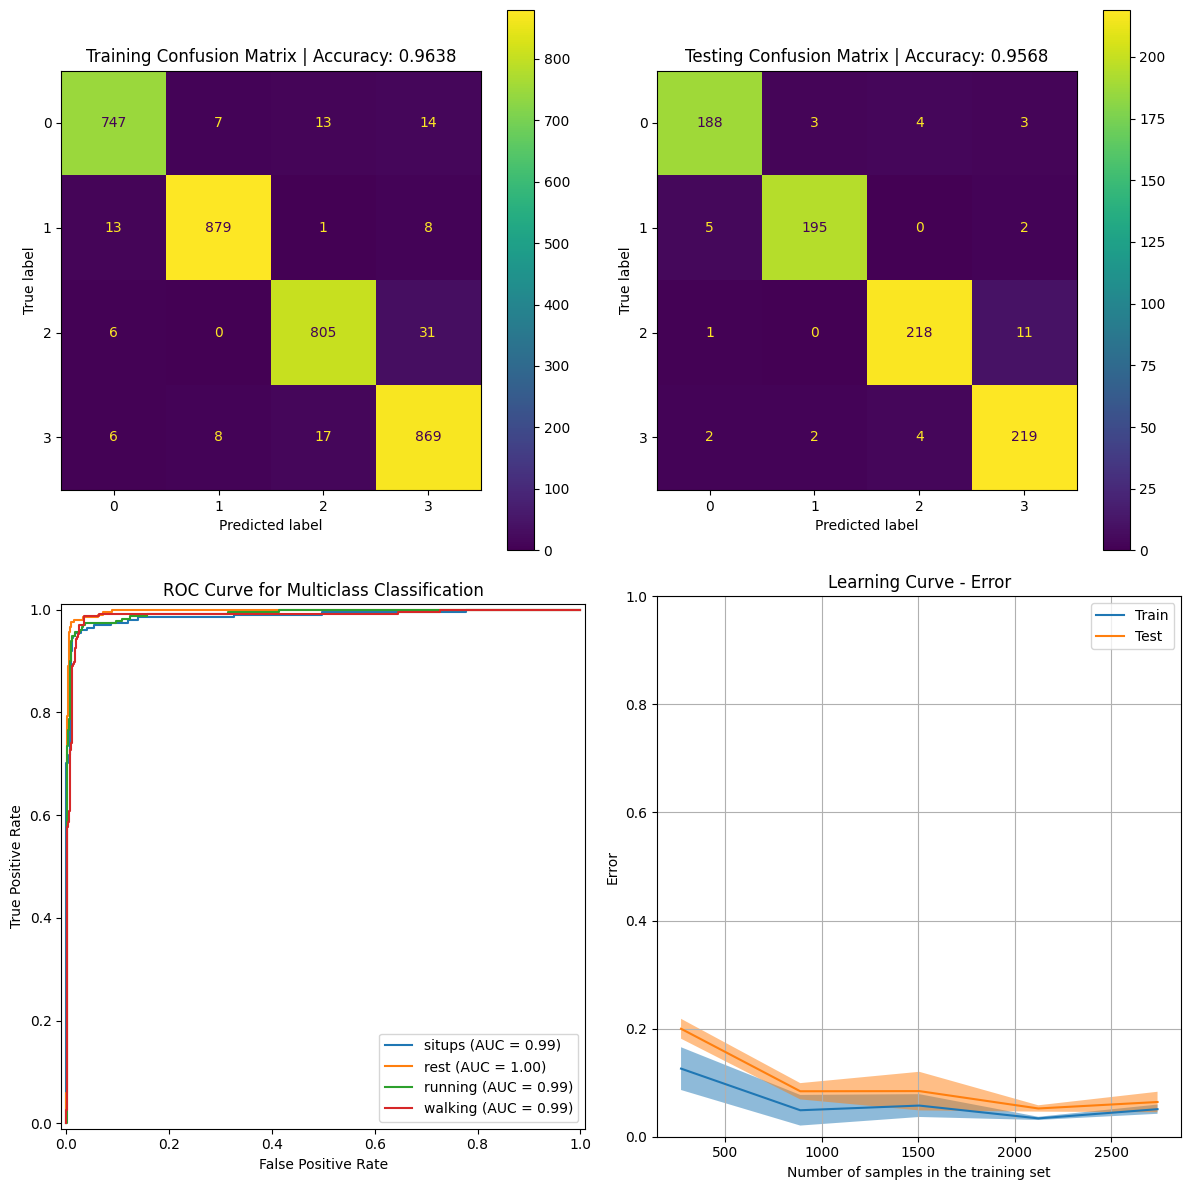

In [120]:
# MLP method
mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 5), alpha=0.01, batch_size=32, learning_rate_init=0.01, learning_rate='constant', activation='relu', solver='sgd', max_iter=10000, random_state=42, early_stopping=True)
mlp.fit(X_train,y_train)
test_pred = mlp.predict(X_test)
train_pred = mlp.predict(X_train)

# Plotting
print(classification_report(y_test, test_pred, target_names=['situps', 'rest', 'running', 'walking'], zero_division=0))

# Confusion Matrix
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
ConfusionMatrixDisplay.from_estimator(mlp, X_train, y_train, ax=axs[0, 0])
train_a = accuracy_score(y_train, train_pred)
ax=axs[0, 0].set_title(f"Training Confusion Matrix | Accuracy: {train_a:.4f}")

ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, ax=axs[0, 1])
test_a = accuracy_score(y_test, test_pred)
ax=axs[0, 1].set_title(f"Testing Confusion Matrix | Accuracy: {test_a:.4f}")

# ROC Curve
X_prob = mlp.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0,1,2,3])
for i, class_label in enumerate(['situps', 'rest', 'running', 'walking']):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], X_prob[:, i], name=f"{class_label}", ax=axs[1, 0])
axs[1, 0].set_title('ROC Curve for Multiclass Classification')
axs[1, 0].set_xlabel("False Positive Rate")
axs[1, 0].set_ylabel("True Positive Rate")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    mlp, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), scoring="accuracy", n_jobs=-1
)
train_errors = 1 - train_scores
test_errors = 1 - test_scores
display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_errors, test_scores=test_errors, score_name="Error")
axs[1, 1].set_title("Learning Curve - Error")
axs[1, 1].set_ylabel("Error")  # Change label to Error
axs[1, 1].grid(True)
axs[1, 1].set_ylim(0, 1)
display.plot(ax=axs[1, 1])

plt.tight_layout()
plt.show()

#print("Predicted Test Values: ", list(map(int, test_pred)))
#print("\nActual Test Values:    ", list(map(int, y_test)))

              precision    recall  f1-score   support

      situps       0.92      0.97      0.94       198
        rest       0.94      0.96      0.95       202
     running       0.99      0.94      0.96       230
     walking       0.96      0.94      0.95       227

    accuracy                           0.95       857
   macro avg       0.95      0.95      0.95       857
weighted avg       0.95      0.95      0.95       857



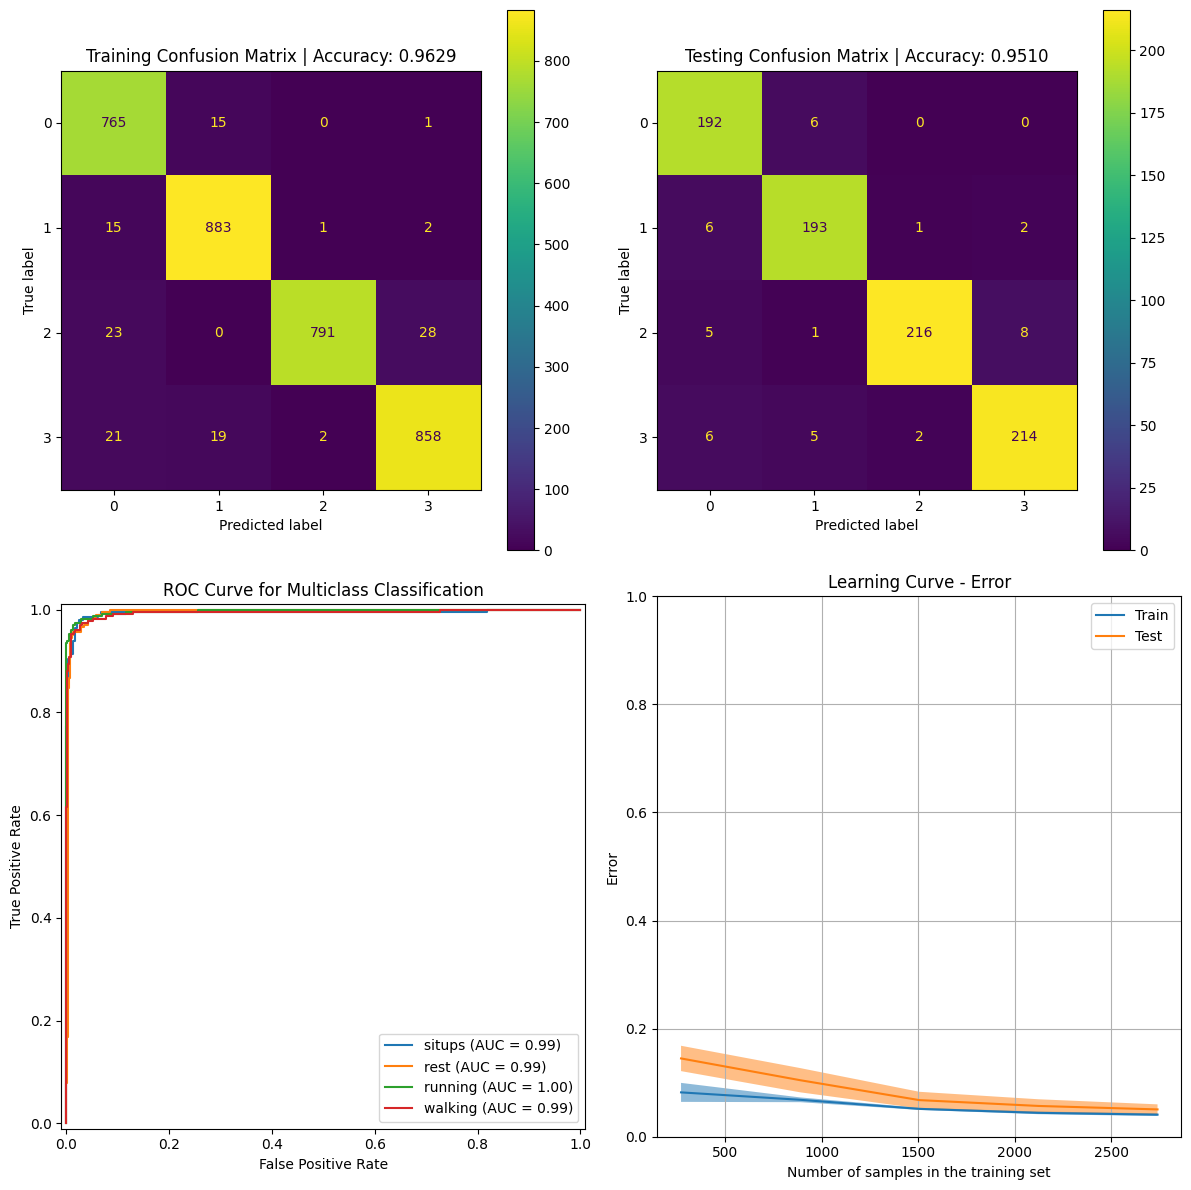

In [121]:
# Define the SVM model (you can set parameters like kernel, C, gamma, etc. as needed)
svm = SVC(kernel='rbf', C=0.3, gamma='scale', probability=True)  # You can adjust C and gamma as needed

# Fit the model with the training data
svm.fit(X_train, y_train)

# Make predictions on the test and training sets
test_pred = svm.predict(X_test)
train_pred = svm.predict(X_train)

# Plotting
print(classification_report(y_test, test_pred, target_names=['situps', 'rest', 'running', 'walking'], zero_division=0))

# Confusion Matrix
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
ConfusionMatrixDisplay.from_estimator(svm, X_train, y_train, ax=axs[0, 0])
train_a = accuracy_score(y_train, train_pred)
ax=axs[0, 0].set_title(f"Training Confusion Matrix | Accuracy: {train_a:.4f}")

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, ax=axs[0, 1])
test_a = accuracy_score(y_test, test_pred)
ax=axs[0, 1].set_title(f"Testing Confusion Matrix | Accuracy: {test_a:.4f}")

# ROC Curve
X_prob = svm.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0,1,2,3])
for i, class_label in enumerate(['situps', 'rest', 'running', 'walking']):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], X_prob[:, i], name=f"{class_label}", ax=axs[1, 0])
axs[1, 0].set_title('ROC Curve for Multiclass Classification')
axs[1, 0].set_xlabel("False Positive Rate")
axs[1, 0].set_ylabel("True Positive Rate")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    svm, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), scoring="accuracy", n_jobs=-1
)
train_errors = 1 - train_scores
test_errors = 1 - test_scores
display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_errors, test_scores=test_errors, score_name="Error")
axs[1, 1].set_title("Learning Curve - Error")
axs[1, 1].set_ylabel("Error")  # Change label to Error
axs[1, 1].grid(True)
axs[1, 1].set_ylim(0, 1)
display.plot(ax=axs[1, 1])

plt.tight_layout()
plt.show()

#print("Predicted Test Values: ", list(map(int, test_pred)))
#print("\nActual Test Values:    ", list(map(int, y_test)))

              precision    recall  f1-score   support

      situps       0.99      0.92      0.95       198
        rest       0.92      1.00      0.95       202
     running       0.99      0.95      0.97       230
     walking       0.95      0.97      0.96       227

    accuracy                           0.96       857
   macro avg       0.96      0.96      0.96       857
weighted avg       0.96      0.96      0.96       857



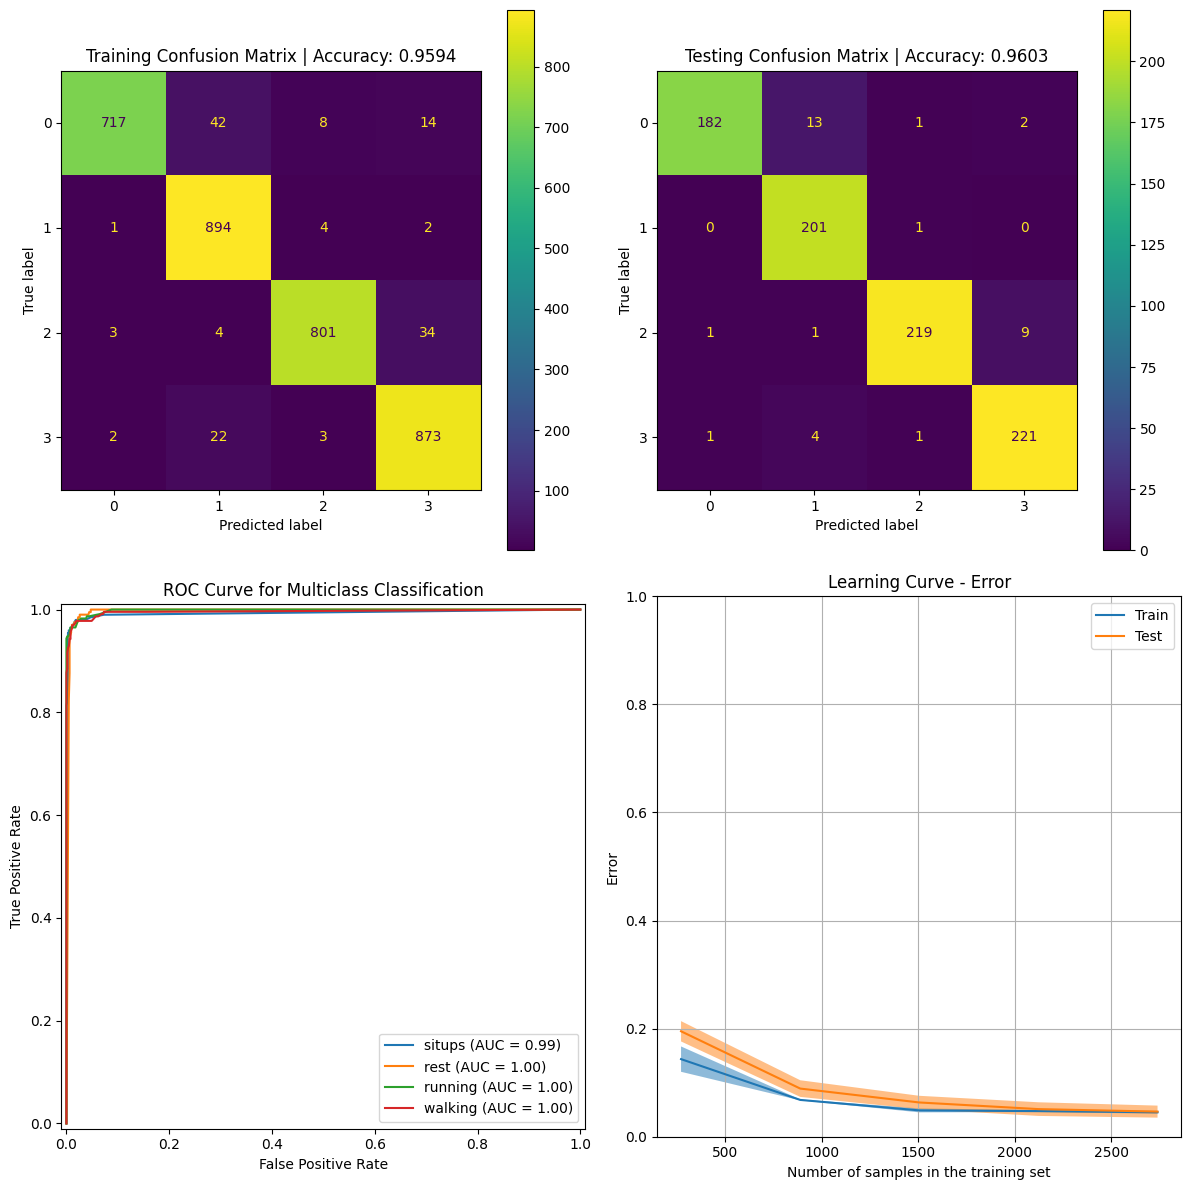

In [122]:
knn = KNeighborsClassifier(n_neighbors=40, metric='manhattan')
# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test se
test_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)

# Plotting
print(classification_report(y_test, test_pred, target_names=['situps', 'rest', 'running', 'walking'], zero_division=0))

# Confusion Matrix
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train, ax=axs[0, 0])
train_a = accuracy_score(y_train, train_pred)
ax=axs[0, 0].set_title(f"Training Confusion Matrix | Accuracy: {train_a:.4f}")

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=axs[0, 1])
test_a = accuracy_score(y_test, test_pred)
ax=axs[0, 1].set_title(f"Testing Confusion Matrix | Accuracy: {test_a:.4f}")

# ROC Curve
X_prob = knn.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0,1,2,3])
for i, class_label in enumerate(['situps', 'rest', 'running', 'walking']):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], X_prob[:, i], name=f"{class_label}", ax=axs[1, 0])
axs[1, 0].set_title('ROC Curve for Multiclass Classification')
axs[1, 0].set_xlabel("False Positive Rate")
axs[1, 0].set_ylabel("True Positive Rate")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), scoring="accuracy", n_jobs=-1
)
train_errors = 1 - train_scores
test_errors = 1 - test_scores
display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_errors, test_scores=test_errors, score_name="Error")
axs[1, 1].set_title("Learning Curve - Error")
axs[1, 1].set_ylabel("Error")  # Change label to Error
axs[1, 1].grid(True)
axs[1, 1].set_ylim(0, 1)
display.plot(ax=axs[1, 1])

plt.tight_layout()
plt.show()

#print("Predicted Test Values: ", list(map(int, test_pred)))
#print("\nActual Test Values:    ", list(map(int, y_test)))

              precision    recall  f1-score   support

      situps       0.94      0.95      0.95       198
        rest       0.97      0.96      0.96       202
     running       0.99      0.88      0.93       230
     walking       0.88      0.98      0.93       227

    accuracy                           0.94       857
   macro avg       0.95      0.94      0.94       857
weighted avg       0.94      0.94      0.94       857



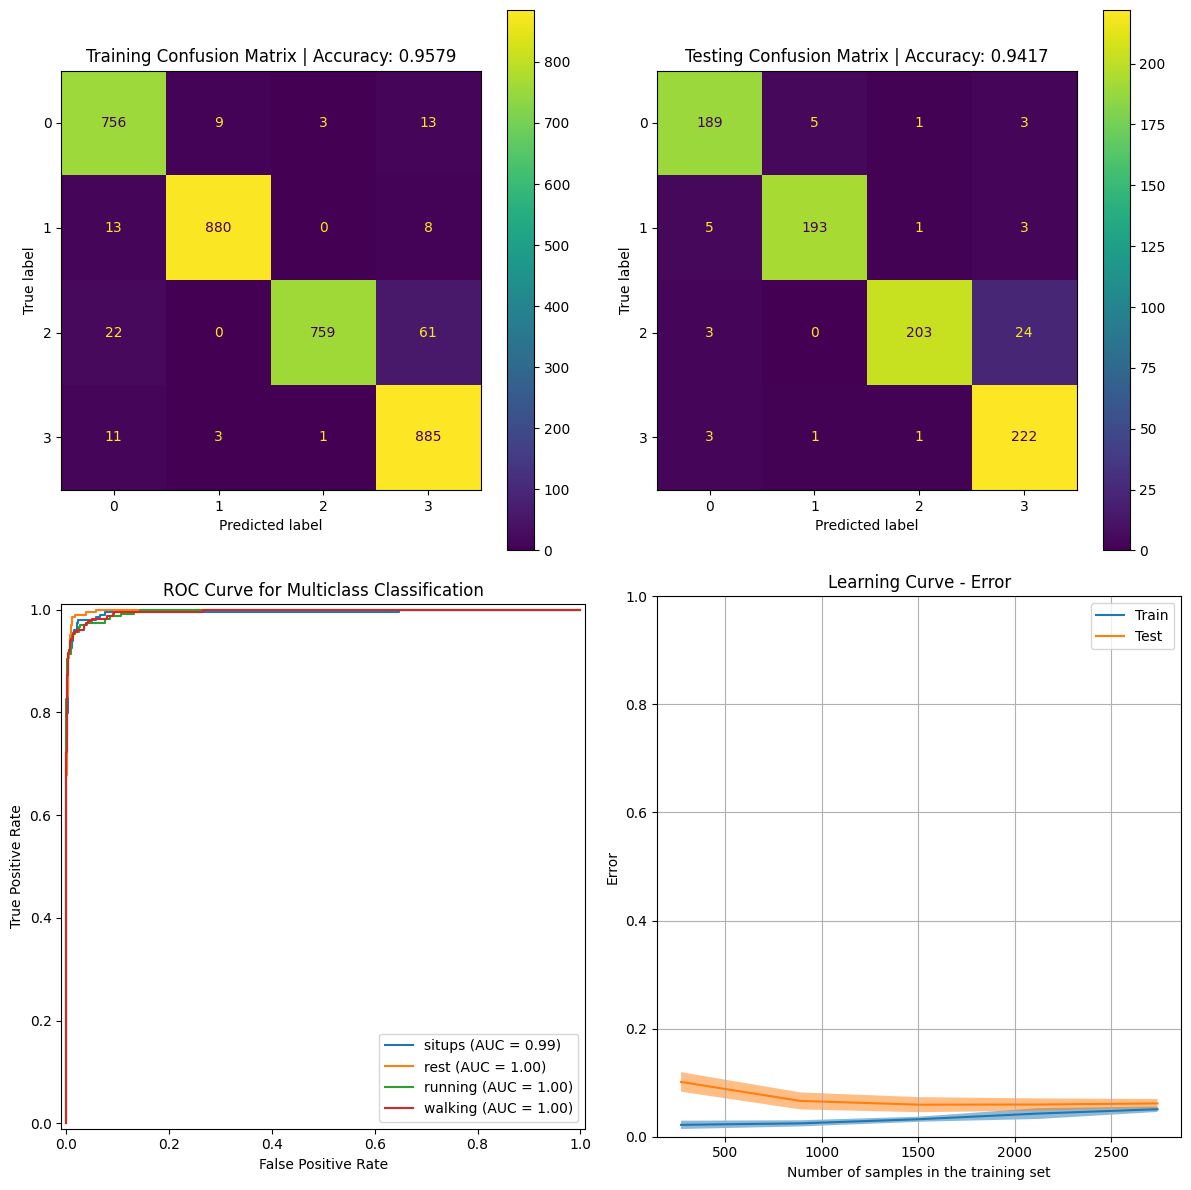

In [132]:
rf = sk.RandomForestClassifier(n_estimators = 25, max_depth = 5) #number of tress
rf = rf.fit(X_train, y_train)
test_pred =rf.predict(X_test)
train_pred = rf.predict(X_train)

# Plotting
print(classification_report(y_test, test_pred, target_names=['situps', 'rest', 'running', 'walking'], zero_division=0))

# Confusion Matrix
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train, ax=axs[0, 0])
train_a = accuracy_score(y_train, train_pred)
ax=axs[0, 0].set_title(f"Training Confusion Matrix | Accuracy: {train_a:.4f}")

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=axs[0, 1])
test_a = accuracy_score(y_test, test_pred)
ax=axs[0, 1].set_title(f"Testing Confusion Matrix | Accuracy: {test_a:.4f}")

# ROC Curve
X_prob = rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0,1,2,3])
for i, class_label in enumerate(['situps', 'rest', 'running', 'walking']):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], X_prob[:, i], name=f"{class_label}", ax=axs[1, 0])
axs[1, 0].set_title('ROC Curve for Multiclass Classification')
axs[1, 0].set_xlabel("False Positive Rate")
axs[1, 0].set_ylabel("True Positive Rate")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), scoring="accuracy", n_jobs=-1
)
train_errors = 1 - train_scores
test_errors = 1 - test_scores
display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_errors, test_scores=test_errors, score_name="Error")
axs[1, 1].set_title("Learning Curve - Error")
axs[1, 1].set_ylabel("Error")  # Change label to Error
axs[1, 1].grid(True)
axs[1, 1].set_ylim(0, 1)
display.plot(ax=axs[1, 1])

plt.tight_layout()
plt.show()

#print("Predicted Test Values: ", list(map(int, test_pred)))
#print("\nActual Test Values:    ", list(map(int, y_test)))

/home/joshua_ml/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/joshua_ml/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_base.py:64: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/home/joshua_ml/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/joshua_ml/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/joshua_ml/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_base.py:64: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/home/joshua_ml/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret

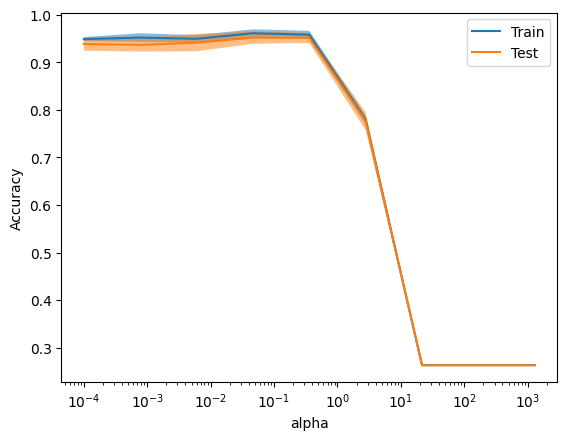

In [124]:
# Validation curve for finding a better alpha, learning rate, etc
param_name, param_range = "alpha", np.logspace(-4, 4, 10)
train_scores, test_scores = validation_curve(
    mlp, X_train, y_train, param_name=param_name, param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1
)

display = ValidationCurveDisplay(
    param_name=param_name, param_range=param_range,
    train_scores=train_scores, test_scores=test_scores, score_name="Accuracy"
)
display.plot()
plt.xscale("log")
plt.show()

In [133]:
with open('mlp.pkl', 'wb') as file:
    pickle.dump(mlp, file)

with open('svm.pkl', 'wb') as file:
    pickle.dump(svm, file)

with open('knn.pkl', 'wb') as file:
    pickle.dump(knn, file)

with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# scp mlp.pkl joshua@raspberrypi:~\Documents\IAB330_har
# scp svm.pkl joshua@raspberrypi:~\Documents\IAB330_har
# scp knn.pkl joshua@raspberrypi:~\Documents\IAB330_har
# scp rf.pkl joshua@raspberrypi:~\Documents\IAB330_har
# scp scaler.pkl joshua@raspberrypi:~\Documents\IAB330_har
# scp mlp.pkl svm.pkl knn.pkl rf.pkl scaler.pkl joshua@raspberrypi:~/Documents/IAB330_har

In [126]:
sklearn.__version__
numpy.__version__

'1.26.4'